# **Polynomial Regression**
All imports


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading CSV

In [56]:
df = pd.read_csv("salary.csv")
df = df.drop(columns = "Position")
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


Extract x and y

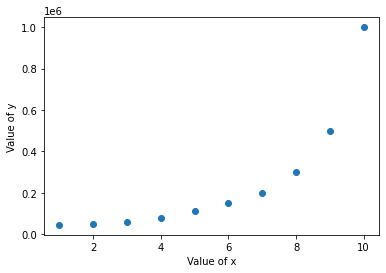

X:     Level  Level0  Level1  Level2  Level3  Level4
0      1       1       1       1       1       1
1      2       1       2       4       8      16
2      3       1       3       9      27      81
3      4       1       4      16      64     256
4      5       1       5      25     125     625
5      6       1       6      36     216    1296
6      7       1       7      49     343    2401
7      8       1       8      64     512    4096
8      9       1       9      81     729    6561
9     10       1      10     100    1000   10000
Y:	Salary
 0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


In [79]:
y = df['Salary']
x = df.drop(columns = "Salary")

# creating polynomial power till order 4
order = 5
for i in range(order):
    x['Level' + str(i)] = x["Level"] ** i

plt.scatter(x['Level'], y)
plt.xlabel("Value of x")
plt.ylabel("Value of y")
plt.show()
print("X: ", x)
print("Y:\tSalary\n", y)

# taking only values
x = x.iloc[:, :].values
y = y.values

Cost function

In [80]:
def costCalculation(x, y, w, b):
    cost = np.sum((y - x.dot(w) - b) ** 2)
    return 2 * cost / len(y)

Gradiant Descent

In [82]:
def lossCalculation(x, y, w, b):
    loss = y - x.dot(w) - b
    return loss

def gradiantDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
    for epoch in range(epochs):
        n = len(y)
        w_grad = (-1 / n) * x.T.dot(lossCalculation(x, y, w, b))
        b_grad = (-1 / n) * np.sum(lossCalculation(x, y, w, b))

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        # print(w_grad)

        cost = costCalculation(x, y, w, b)
        cost_list[epoch] = cost
        if epoch % 500 == 0:
            print(f"Epoch: {epoch} --> Cost: {cost}")
        
    return w, b, cost_list
w, b, learning_rate, epochs = np.zeros(x.shape[1]), 0, 0.00000005, 10000
w, b, cost_list = gradiantDescent(x, y, w, b, learning_rate, epochs)
print("W: ", w, "B: ", b)

Epoch: 0 --> Cost: 13885607540.508682
Epoch: 500 --> Cost: 7450895771.815971
Epoch: 1000 --> Cost: 7409096281.857678
Epoch: 1500 --> Cost: 7372981372.415884
Epoch: 2000 --> Cost: 7341730061.526227
Epoch: 2500 --> Cost: 7314639956.485846
Epoch: 3000 --> Cost: 7291110123.854616
Epoch: 3500 --> Cost: 7270626433.852984
Epoch: 4000 --> Cost: 7252749021.73432
Epoch: 4500 --> Cost: 7237101560.338735
Epoch: 5000 --> Cost: 7223362082.206659
Epoch: 5500 --> Cost: 7211255127.420995
Epoch: 6000 --> Cost: 7200545025.678986
Epoch: 6500 --> Cost: 7191030148.756251
Epoch: 7000 --> Cost: 7182537993.191782
Epoch: 7500 --> Cost: 7174920973.269963
Epoch: 8000 --> Cost: 7168052821.698496
Epoch: 8500 --> Cost: 7161825510.20175
Epoch: 9000 --> Cost: 7156146614.928694
Epoch: 9500 --> Cost: 7150937062.422693
W:  [  22.12934611   10.91877715   22.12934611   15.90417335 -180.34053402
  110.28049516] B:  10.918777153350762


Ploting cost list

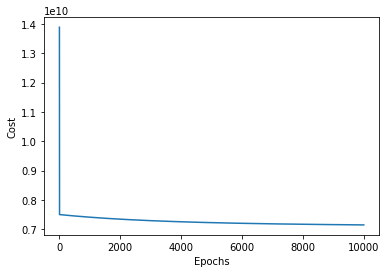

In [83]:
plt.plot(cost_list)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

Predic values

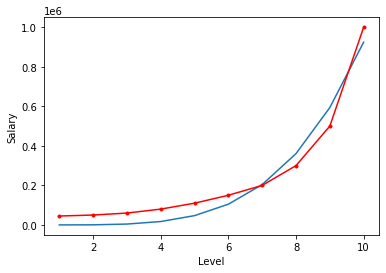

In [84]:
def prediction(x, w, b):
    return x.dot(w) + b

y_predicted = prediction(x, w, b)
# predicted graph
plt.plot(df['Level'].values, y_predicted)
# actual y graph
plt.plot(df["Level"].values, y, color = 'red', marker = '.')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()